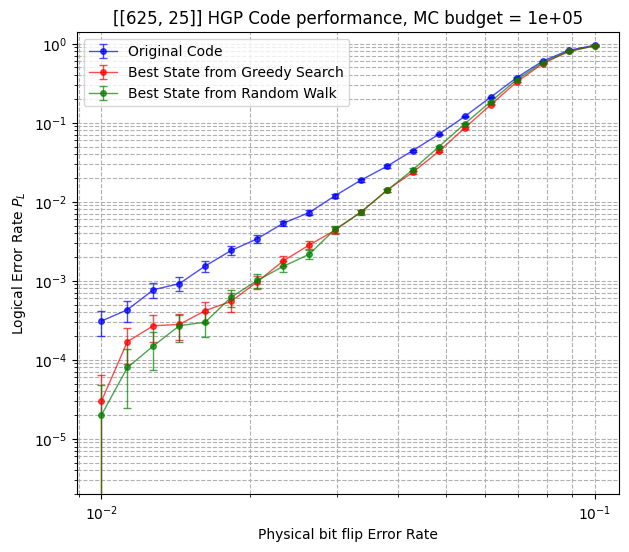

total_runtime - original: 0h 59m 37s
greedy_bpmaxiter = 62 runtimes: [ 14.86426115  15.55330086  17.08639884  18.46274424  21.1099999
  24.49224615  29.22665596  36.009583    45.32252312  57.65051484
  75.79291081  99.97409701 130.025033   169.23510909 217.31766176
 277.67968512 346.79086185 427.02018499 521.42210889 607.01013517]
total_runtime - greedy_bpmaxiter62: 0h 52m 32s
total_runtime - random_walk: 0h 48  m 20s


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

original_data = {}
greedy_exploration_results_found_from_bpmaxiter62 = {}
random_walk_exploration_results = {}

original_state_analysis_path = '../results/analysis_original_state.hdf5'
analysis_best_from_greedy_bpmaxiter62_path = '../results/analysis_best_from_greedy_bpmaxiter_62_run4_2.hdf5'
analysis_best_from_random_walk_path = '../results/analysis_best_from_random_walk.hdf5'

# Load the original state data
with h5py.File(original_state_analysis_path, 'r') as f:
    for code, grp in f.items():
        original_data[code] = {}
        original_data[code]['MC_budget'] = grp.attrs['MC_budget']
        original_data[code]['physical_error_rates'] = grp['physical_error_rates'][()].copy()
        original_data[code]['logical_error_rates'] = grp['logical_error_rates'][()].copy()
        original_data[code]['logical_error_rates_std'] = grp['logical_error_rates_std'][()].copy()
        original_data[code]['decoding_runtimes'] = grp['runtimes'][()].copy()

with h5py.File(analysis_best_from_greedy_bpmaxiter62_path, 'r') as f:
    for code, grp in f.items():
        greedy_exploration_results_found_from_bpmaxiter62[code] = {}
        greedy_exploration_results_found_from_bpmaxiter62[code]['MC_budget'] = grp.attrs['MC_budget']
        greedy_exploration_results_found_from_bpmaxiter62[code]['physical_error_rates'] = grp['physical_error_rates'][()].copy()
        greedy_exploration_results_found_from_bpmaxiter62[code]['logical_error_rates'] = grp['logical_error_rates'][()].copy()
        greedy_exploration_results_found_from_bpmaxiter62[code]['logical_error_rates_std'] = grp['logical_error_rates_std'][()].copy()
        greedy_exploration_results_found_from_bpmaxiter62[code]['decoding_runtimes'] = grp['runtimes'][()].copy()

with h5py.File(analysis_best_from_random_walk_path, 'r') as f:
    for code, grp in f.items():
        random_walk_exploration_results[code] = {}
        random_walk_exploration_results[code]['MC_budget'] = grp.attrs['MC_budget']
        random_walk_exploration_results[code]['physical_error_rates'] = grp['physical_error_rates'][()].copy()
        random_walk_exploration_results[code]['logical_error_rates'] = grp['logical_error_rates'][()].copy()
        random_walk_exploration_results[code]['logical_error_rates_std'] = grp['logical_error_rates_std'][()].copy()
        random_walk_exploration_results[code]['decoding_runtimes'] = grp['runtimes'][()].copy()


plt.figure(figsize=(7, 6))
for code, data in original_data.items():
    x = data['physical_error_rates'].flatten()
    y = data['logical_error_rates'].flatten()
    std = data['logical_error_rates_std'].flatten()
    error_margin = 1.96 * std  # 95% confidence interval

    plt.errorbar(x, y, yerr=error_margin, fmt='o-', label=f'Original Code', color='blue', markersize=4, linewidth=1, capsize=3, alpha=0.7)

for code, data in greedy_exploration_results_found_from_bpmaxiter62.items():
    x = data['physical_error_rates'].flatten()
    y = data['logical_error_rates'].flatten()
    std = data['logical_error_rates_std'].flatten()
    error_margin = 1.96 * std  # 95% confidence interval

    plt.errorbar(x, y, yerr=error_margin, fmt='o-', label=f'Best State from Greedy Search', color='red', markersize=4, linewidth=1, capsize=3, alpha=0.7)

for code, data in random_walk_exploration_results.items():
    x = data['physical_error_rates'].flatten()
    y = data['logical_error_rates'].flatten()
    std = data['logical_error_rates_std'].flatten()
    error_margin = 1.96 * std  # 95% confidence interval

    plt.errorbar(x, y, yerr=error_margin, fmt='o-', label=f'Best State from Random Walk', color='green', markersize=4, linewidth=1, capsize=3, alpha=0.7)

plt.xlabel('Physical bit flip Error Rate')
plt.ylabel('Logical Error Rate ${P_L}$')
plt.xscale('log')
plt.yscale('log')
plt.ylim(2e-6, 1.4)
plt.title(f'[[625, 25]] HGP Code performance, MC budget = {original_data[code]["MC_budget"]:.0e}')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()

original_total_runtime_seconds = sum(original_data[code]['decoding_runtimes'])
original_total_runtime_string = f"{original_total_runtime_seconds // 3600:.0f}h {original_total_runtime_seconds % 3600 // 60:.0f}m {original_total_runtime_seconds % 60:.0f}s"
print(f"total_runtime - original: {original_total_runtime_string}")

greedy_bpmaxiter62_total_runtime_seconds = sum(greedy_exploration_results_found_from_bpmaxiter62[code]['decoding_runtimes'])
greedy_bpmaxiter62_total_runtime_string = f"{greedy_bpmaxiter62_total_runtime_seconds // 3600:.0f}h {greedy_bpmaxiter62_total_runtime_seconds % 3600 // 60:.0f}m {greedy_bpmaxiter62_total_runtime_seconds % 60:.0f}s"
print(f"greedy_bpmaxiter = 62 runtimes: {greedy_exploration_results_found_from_bpmaxiter62[code]['decoding_runtimes']}")
print(f"total_runtime - greedy_bpmaxiter62: {greedy_bpmaxiter62_total_runtime_string}")

random_walk_total_runtime_seconds = sum(random_walk_exploration_results[code]['decoding_runtimes'])
random_walk_total_runtime_string = f"{random_walk_total_runtime_seconds // 3600:.0f}h {random_walk_total_runtime_seconds % 3600 // 60:.0f}  m {random_walk_total_runtime_seconds % 60:.0f}s"
print(f"total_runtime - random_walk: {random_walk_total_runtime_string}")

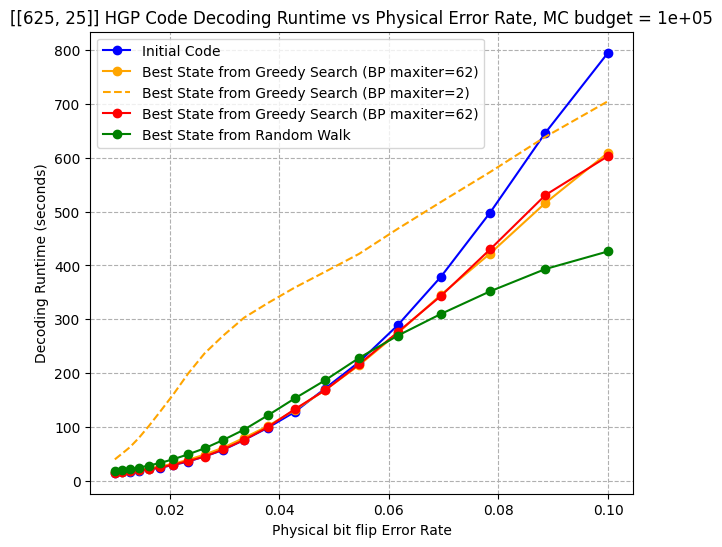

In [171]:
plt.figure(figsize=(7, 6))
# plot runtimes vs physical error rates
plt.plot(original_data[code]['physical_error_rates'], original_data[code]['decoding_runtimes'], 'o-', label='Initial Code', color='blue')
plt.plot(greedy_exploration_results[code]['physical_error_rates'], greedy_exploration_results[code]['decoding_runtimes'], 'o-', label='Best State from Greedy Search (BP maxiter=62)', color='orange')
plt.plot(greedy_exploration_results_bpmaxiter2[code]['physical_error_rates'], greedy_exploration_results_bpmaxiter2[code]['decoding_runtimes'], '--', label='Best State from Greedy Search (BP maxiter=2)', color='orange')
plt.plot(greedy_exploration_results_found_from_bpmaxiter62[code]['physical_error_rates'], greedy_exploration_results_found_from_bpmaxiter62[code]['decoding_runtimes'], 'o-', label='Best State from Greedy Search (BP maxiter=62)', color='red')
plt.plot(random_walk_exploration_results[code]['physical_error_rates'], random_walk_exploration_results[code]['decoding_runtimes'], 'o-', label='Best State from Random Walk', color='green')

plt.xlabel('Physical bit flip Error Rate')
plt.ylabel('Decoding Runtime (seconds)')
plt.title(f'[[625, 25]] HGP Code Decoding Runtime vs Physical Error Rate, MC budget = {original_data[code]["MC_budget"]:.0e}')
plt.legend()
plt.grid(True, which='both', ls='--')
plt.show()

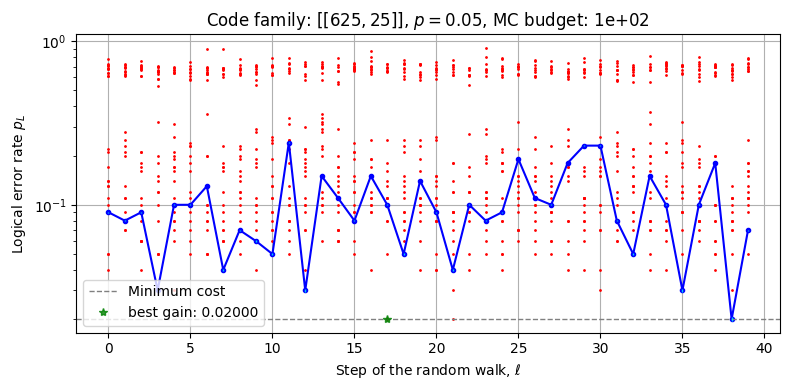

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# codes = ['[625,25]', '[1225,65]', '[1600,64]', '[2025,81]']
codes = ['[625,25]']
# physical_error_rates = ['0.05', '8/32', '9/32', '12/32']
physical_error_rates = ['0.05']
fn_data = {}

output_file_path = '../results/random_walk.hdf5'

with h5py.File(output_file_path, 'r') as f:
    for code, grp in f.items():
        fn_data[code] = {}
        fn_data[code]['MC_budget'] = grp.attrs['MC_budget']
        fn_data[code]['total_runtime'] = grp.attrs['total_runtime']
        fn_data[code]['states'] = grp['states'][()].copy()
        fn_data[code]['logical_error_rates'] = grp['logical_error_rates'][()].copy()
        fn_data[code]['stds'] = grp['logical_error_rates_std'][()].copy()

# exploration_params = {code: par for code, par in zip(codes, [(24, 120), (15, 70), (12, 40), (8, 30)])}
exploration_params = {code: par for code, par in zip(codes, [(24, 40)])}

for code in fn_data:
    fn_data[code]['logical_error_rates'] = fn_data[code]['logical_error_rates'].reshape(exploration_params[code])

# fig, (ax0, ax1, ax2, ax3) = plt.subplots(1, 4, figsize=(16,4), sharey=True)
fig, (ax0) = plt.subplots(1, 1, figsize=(8, 4), sharey=True)

# for code, ax, physical_error_rate in zip(codes, [ax0, ax1, ax2, ax3], physical_error_rates):
for code, ax, physical_error_rate in zip(codes, [ax0], physical_error_rates):
    data_0 = fn_data[code]
    ax.set_title(f'Code family: $[{code}]$, $p = {physical_error_rate}$, MC budget: {data_0["MC_budget"]:.0e}')
    x = np.arange(len(data_0['logical_error_rates'].T))
    ax.semilogy(x, data_0['logical_error_rates'][1:].T, 'r.', markersize=2)
    ax.semilogy(x, data_0['logical_error_rates'][0].T, 'b.-')
    minimum_cost = data_0['logical_error_rates'][0].min()
    ax.axhline(minimum_cost, color='gray', linestyle='--', linewidth=1, label='Minimum cost')
    
    gain = data_0['logical_error_rates'][0][0]/data_0['logical_error_rates'].min()
    ax.semilogy(data_0['logical_error_rates'].min(axis=0).argmin(), data_0['logical_error_rates'].min(), 'g*', alpha=0.8, 
              linewidth=1, label=f'best gain: {minimum_cost:.5f}')
    ax.vlines(x, data_0['logical_error_rates'][0].T - 1.96*data_0['stds'][0]/fn_data[code]['MC_budget'], 
                data_0['logical_error_rates'][0].T + 1.96*data_0['stds'][0]/fn_data[code]['MC_budget'], alpha=0.8, color='cyan', linewidth=1)
    ax.set_xlabel('Step of the random walk, $\\ell$')
    ax.set_ylabel('Logical error rate $p_L$')
    ax.grid('minor')
    ax.legend()
# plt.xlim([0, 19])
# plt.ylim([8e-3, 7e-2])
plt.tight_layout()

# plt.savefig('../img/exploration.pdf')

plt.show()

# Greedy Exploration result

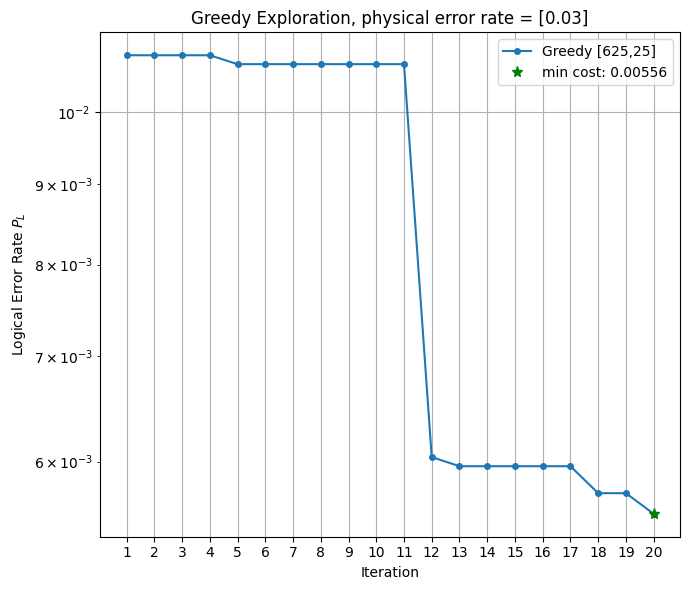

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

codes = ['[625,25]']
physical_error_rates = ['0.03']
fn_data = {}

original_state_analysis_path = '../results/greedy_exploration.hdf5'

with h5py.File(original_state_analysis_path, 'r') as f:
    for code, grp in f.items():
        fn_data[code] = {}
        fn_data[code]['MC_budget'] = grp.attrs['MC_budget']
        fn_data[code]['physical_error_rate'] = grp.attrs['p']
        fn_data[code]['total_runtime'] = grp.attrs['runtime']
        fn_data[code]['num_iterations'] = grp.attrs['num_iterations']
        fn_data[code]['states'] = grp['states'][()].copy()
        fn_data[code]['logical_error_rates'] = grp['logical_error_rates'][()].copy()
        fn_data[code]['stds'] = grp['logical_error_rates_std'][()].copy()

plt.figure(figsize=(7, 6))
for code, data in fn_data.items():
    plt.plot(np.arange(1, data['num_iterations'] + 1, dtype=int), data['logical_error_rates'], marker='o', markersize=4, label=f'Greedy {code}')
    min_idx = np.unravel_index(np.argmin(data['logical_error_rates']), data['logical_error_rates'].shape)
    best_gain = data['logical_error_rates'][0][0] / data['logical_error_rates'][min_idx]
    minimum_cost = data['logical_error_rates'][min_idx]
    plt.plot(min_idx[0] + 1, data['logical_error_rates'][min_idx], 'g*', markersize=8, linewidth=1, label=f'min cost: {float(minimum_cost):.5f}')

plt.title(f'Greedy Exploration, physical error rate = [{data["physical_error_rate"]}]')
plt.xlabel('Iteration')
plt.ylabel('Logical Error Rate ${P_L}$')
plt.yscale('log')
plt.legend()
plt.grid()
plt.xticks(np.arange(1, data['num_iterations'] + 1, dtype=int))
plt.tight_layout()
plt.show()

Run 1 total runtime in seconds: 7999.002612113953
Run 1 total runtime: 2h 13m 19s
Run 2 total runtime in seconds: 7907.4487891197205
Run 2 total runtime: 2h 11m 47s
Run 3 total runtime in seconds: 7371.677432775497
Run 3 total runtime: 2h 2m 52s
Run 4 total runtime in seconds: 7752.579758167267
Run 4 total runtime: 2h 9m 13s
Run 5 total runtime in seconds: 7753.1771149635315
Run 5 total runtime: 2h 9m 13s
Run 6 total runtime in seconds: 7673.833503961563
Run 6 total runtime: 2h 7m 54s
Run 7 total runtime in seconds: 7713.872558116913
Run 7 total runtime: 2h 8m 34s
Run 8 total runtime in seconds: 7257.811807870865
Run 8 total runtime: 2h 0m 58s
Run 9 total runtime in seconds: 7590.610255718231
Run 9 total runtime: 2h 6m 31s
Run 10 total runtime in seconds: 8042.3985159397125
Run 10 total runtime: 2h 14m 2s


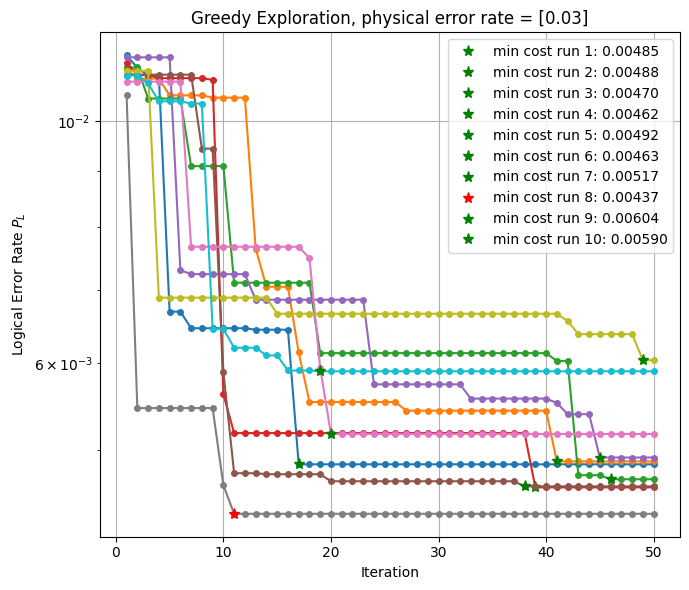

Total runtime across all runs: 21.0h 24.0m 22.412348747253418s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

codes = ['[625,25]']
physical_error_rates = ['0.03']
fn_data = {}

output_file_path_list = [f'../results/greedy_exploration_run{i}.hdf5' for i in range(1, 11)]

total_runtime_seconds = 0
for i in range(len(output_file_path_list)):
    # Load the data from each file
    with h5py.File(output_file_path_list[i], 'r') as f:
        for code, grp in f.items():
            fn_data[i] = {}
            fn_data[i][code] = {}
            fn_data[i][code]['MC_budget'] = grp.attrs['MC_budget']
            fn_data[i][code]['physical_error_rate'] = grp.attrs['p']
            fn_data[i][code]['total_runtime'] = grp.attrs['runtime']
            print(f"Run {i+1} total runtime in seconds: {fn_data[i][code]['total_runtime']}")
            print(f"Run {i+1} total runtime: {fn_data[i][code]['total_runtime'] // 3600:.0f}h {fn_data[i][code]['total_runtime'] % 3600 // 60:.0f}m {fn_data[i][code]['total_runtime'] % 60:.0f}s")
            total_runtime_seconds += grp.attrs['runtime']
            fn_data[i][code]['num_iterations'] = grp.attrs['num_iterations']
            fn_data[i][code]['states'] = grp['states'][()].copy()
            fn_data[i][code]['logical_error_rates'] = grp['logical_error_rates'][()].copy()
            fn_data[i][code]['stds'] = grp['logical_error_rates_std'][()].copy()

plt.figure(figsize=(7, 6))
for i in range(len(fn_data)):
    data = fn_data[i][codes[0]]
    plt.plot(np.arange(1, data['num_iterations'] + 1, dtype=int), data['logical_error_rates'], marker='o', markersize=4)
    min_idx = np.unravel_index(np.argmin(data['logical_error_rates']), data['logical_error_rates'].shape)
    best_gain = data['logical_error_rates'][0][0] / data['logical_error_rates'][min_idx]
    minimum_cost = data['logical_error_rates'][min_idx]
    if i == 7:
        plt.plot(min_idx[0] + 1, data['logical_error_rates'][min_idx], 'r*', markersize=8, linewidth=1, label=f'min cost run {i+1}: {float(minimum_cost):.5f}')
    else:
        # Use green star for all other runs
        plt.plot(min_idx[0] + 1, data['logical_error_rates'][min_idx], 'g*', markersize=8, linewidth=1, label=f'min cost run {i+1}: {float(minimum_cost):.5f}')

plt.title(f'Greedy Exploration, physical error rate = [{data["physical_error_rate"]}]')
plt.xlabel('Iteration')
plt.ylabel('Logical Error Rate ${P_L}$')
plt.yscale('log')
plt.legend()
plt.grid()
# plt.xticks(np.arange(1, data['num_iterations'] + 1, dtype=int))
plt.tight_layout()
plt.show()

print(f"Total runtime across all runs: {total_runtime_seconds // 3600}h {total_runtime_seconds % 3600 // 60}m {total_runtime_seconds % 60}s")

# Greedy search result with bp_max_iter=62

Run 1 minimum cost: 0.00477, best gain: 2.469601677148847
Run 2 minimum cost: 0.00644, best gain: 1.96583850931677
Run 3 minimum cost: 0.0058, best gain: 1.9844827586206897
Run 4 minimum cost: 0.00434, best gain: 2.824884792626728
Run 5 minimum cost: 0.00544, best gain: 2.2959558823529407
Run 6 minimum cost: 0.00487, best gain: 2.3326488706365502
Run 7 minimum cost: 0.00475, best gain: 2.505263157894737
Run 8 minimum cost: 0.00532, best gain: 2.2800751879699246
Run 9 minimum cost: 0.00645, best gain: 1.8325581395348838
Run 10 minimum cost: 0.00447, best gain: 2.78076062639821


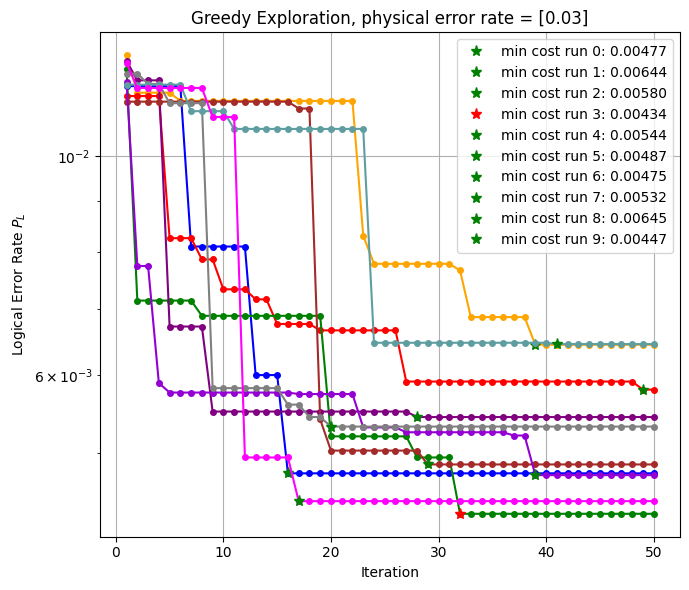

Total runtime across all runs: 10.0h 8.0m 6.809014797210693s


In [206]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

codes = ['[625,25]']
physical_error_rates = ['0.03']
fn_data = {}

output_file_path_list = [f'../results/greedy_exploration_bpmaxiter_62_run{i}.hdf5' for i in range(1, 11)]

total_runtime_seconds = 0
for i in range(len(output_file_path_list)):
    # Load the data from each file
    with h5py.File(output_file_path_list[i], 'r') as f:
        for code, grp in f.items():
            fn_data[i] = {}
            fn_data[i][code] = {}
            fn_data[i][code]['MC_budget'] = grp.attrs['MC_budget']
            fn_data[i][code]['physical_error_rate'] = grp.attrs['p']
            fn_data[i][code]['total_runtime'] = grp.attrs['runtime']
            total_runtime_seconds += grp.attrs['runtime']
            fn_data[i][code]['num_iterations'] = grp.attrs['num_iterations']
            fn_data[i][code]['states'] = grp['states'][()].copy()
            fn_data[i][code]['logical_error_rates'] = grp['logical_error_rates'][()].copy()
            fn_data[i][code]['stds'] = grp['logical_error_rates_std'][()].copy()

colors = ['blue', 'orange', 'red', 'green', 'purple', 'brown', 'darkviolet', 'gray', 'cadetblue', 'magenta']
plt.figure(figsize=(7, 6))
for i in range(len(fn_data)):
    data = fn_data[i][codes[0]]
    plt.plot(np.arange(1, data['num_iterations'] + 1, dtype=int), data['logical_error_rates'], marker='o', markersize=4, color=colors[i])
    min_idx = np.unravel_index(np.argmin(data['logical_error_rates']), data['logical_error_rates'].shape)
    best_gain = data['logical_error_rates'][0][0] / data['logical_error_rates'][min_idx]
    minimum_cost = data['logical_error_rates'][min_idx]

    print(f"Run {i+1} minimum cost: {minimum_cost}, best gain: {best_gain}")

    if i == 3:
        plt.plot(min_idx[0] + 1, data['logical_error_rates'][min_idx], 'r*', markersize=8, linewidth=1, label=f'min cost run {i}: {float(minimum_cost):.5f}')
    else:
        # Use green star for all other runs
        plt.plot(min_idx[0] + 1, data['logical_error_rates'][min_idx], 'g*', markersize=8, linewidth=1, label=f'min cost run {i}: {float(minimum_cost):.5f}')

plt.title(f'Greedy Exploration, physical error rate = [{data["physical_error_rate"]}]')
plt.xlabel('Iteration')
plt.ylabel('Logical Error Rate ${P_L}$')
plt.yscale('log')
plt.legend()
plt.grid()
# plt.xticks(np.arange(1, data['num_iterations'] + 1, dtype=int))
plt.tight_layout()
plt.show()

print(f"Total runtime across all runs: {total_runtime_seconds // 3600}h {total_runtime_seconds % 3600 // 60}m {total_runtime_seconds % 60}s")